In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
### Br15 ###

#1M
AA_ref_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AA_2AE3APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/2AE_3APTMS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTMethS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMethylS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTMS_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APTES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_Br15_1M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APDES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AA_APDMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


#1.2M
AB_ref_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A1_ref_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_ref_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_ref_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_ref_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_ref_5 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APTMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B2_APTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APTMS_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APTMS_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APTMS_5 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_1v2_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_anth_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A3_anthraTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_anth_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_anth_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_phen_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A4_PanthraTES_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_phen_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_phen_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_APDES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_APDMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APDMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APDMS_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_2v2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

AB_APTES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
AB_APTES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_2v2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


#1.45M








In [4]:
### Br25 ###

#1M

#1.2M

BB_ref_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_ref_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_ref_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_ref_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


BB_APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_APTMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_APTMS_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_APTMS_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

BB_2AE3APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTMS_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTMS_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

BB_2AE3APTES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTES_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BB_2AE3APTES_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


#1.45M
BC_ref_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A5_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_ref_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A6_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_ref_3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_ref_4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

BC_2AE3APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/2AE_3APTMS_Br25_1.45M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APTMethS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMethylS_Br25_1.45M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APTMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APTMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APDMS_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APDMS_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_Br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APTES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APTES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
BC_APDES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)




In [5]:
### PbI2 samples

Pb_ref_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
Pb_ref_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

Pb_APDES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
Pb_APDES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

Pb_APTES_1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
Pb_APTES_2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)






In [6]:
### FITS ###

### Br15 ###

#1M
AA_ref_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_ref_1['Counts']))

AA_2AE3APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/2AE_3APTMS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_2AE3APTMS_1['Counts']))
AA_APTMethS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMethylS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTMethS_1['Counts']))
AA_APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTMS_1['Counts']))
AA_APTMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTMS_2['Counts']))
AA_APTMS_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br15_1M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTMS_3['Counts']))
AA_APTES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTES_1['Counts']))
AA_APTES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_Br15_1M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APTES_2['Counts']))
AA_APDES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APDES_1['Counts']))
AA_APDMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_Br15_1M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AA_APDMS_1['Counts']))

#1.2M
AB_ref_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A1_ref_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_ref_1['Counts']))
AB_ref_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_ref_2['Counts']))
AB_ref_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_ref_3['Counts']))
AB_ref_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_ref_4['Counts']))
AB_ref_5_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_ref_5['Counts']))

AB_APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTMS_1['Counts']))
AB_APTMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B2_APTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTMS_2['Counts']))
AB_APTMS_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTMS_3['Counts']))
AB_APTMS_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTMS_4['Counts']))
AB_APTMS_5_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_1v2_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTMS_5['Counts']))

AB_anth_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A3_anthraTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_anth_1['Counts']))
AB_anth_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_anth_2['Counts']))
AB_anth_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_anth_3['Counts']))

AB_phen_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A4_PanthraTES_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_phen_1['Counts']))
AB_phen_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_phen_2['Counts']))
AB_phen_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_phen_3['Counts']))

AB_APDES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APDES_1['Counts']))

AB_APDMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APDMS_1['Counts']))
AB_APDMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APDMS_2['Counts']))
AB_APDMS_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_2v2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APDMS_3['Counts']))

AB_APTES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_1_br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTES_1['Counts']))
AB_APTES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_2v2_Br15_1.2M_500KHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(AB_APTES_2['Counts']))

### Br25 ###

#1.2M

BB_ref_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_ref_1['Counts']))
BB_ref_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_ref_2['Counts']))
BB_ref_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_ref_3['Counts']))
BB_ref_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_ref_4['Counts']))


BB_APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_APTMS_1['Counts']))
BB_APTMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_APTMS_2['Counts']))
BB_APTMS_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_APTMS_3['Counts']))
BB_APTMS_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_APTMS_4['Counts']))

BB_2AE3APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTMS_1['Counts']))
BB_2AE3APTMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTMS_2['Counts']))
BB_2AE3APTMS_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTMS_3['Counts']))
BB_2AE3APTMS_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTMS_4['Counts']))

BB_2AE3APTES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTES_1['Counts']))
BB_2AE3APTES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTES_2['Counts']))
BB_2AE3APTES_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTES_3['Counts']))
BB_2AE3APTES_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BB_2AE3APTES_4['Counts']))


#1.45M
BC_ref_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A5_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_ref_1['Counts']))
BC_ref_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A6_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_ref_2['Counts']))
BC_ref_3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_ref_3['Counts']))
BC_ref_4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_ref_4['Counts']))

BC_2AE3APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/2AE_3APTMS_Br25_1.45M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_2AE3APTMS_1['Counts']))
BC_APTMethS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMethylS_Br25_1.45M_1MHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APTMethS_1['Counts']))
BC_APTMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_Br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APTMS_1['Counts']))
BC_APTMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTMS_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APTMS_2['Counts']))
BC_APDMS_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APDMS_1['Counts']))
BC_APDMS_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDMS_Br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APDMS_2['Counts']))
BC_APTES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APTES_1['Counts']))
BC_APTES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br25_1.45M_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APTES_2['Counts']))
BC_APDES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br25_1.45M_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(BC_APDES_1['Counts']))

### PbI2 samples

Pb_ref_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_ref_1['Counts']))
Pb_ref_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/ref_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_ref_2['Counts']))

Pb_APDES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_APDES_1['Counts']))
Pb_APDES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APDES_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_APDES_2['Counts']))

Pb_APTES_1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br15_1M_7%PbI2_500kHz.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_APTES_1['Counts']))
Pb_APTES_2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/7_12_22/APTES_br15_1M_7%PbI2_500kHz_2.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False, skiprows=np.argmax(Pb_APTES_2['Counts']))


112.0


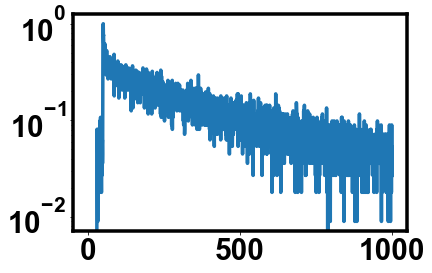

In [7]:
print(np.max(AA_ref_1['Counts']))
plt.plot(AA_ref_1['XAxis'].values, AA_ref_1['Counts'].values/np.max(AA_ref_1['Counts']))
plt.yscale('log')

In [11]:
stretched_AA_ref_1       =stretch_exp_fit(AA_ref_1_fit['Counts'].values/np.max(AA_ref_1_fit['Counts']), AA_ref_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_2AE3APTMS_1 =stretch_exp_fit(AA_2AE3APTMS_1_fit['Counts'].values/np.max(AA_2AE3APTMS_1_fit['Counts']), AA_2AE3APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTMethS_1  =stretch_exp_fit(AA_APTMethS_1_fit['Counts'].values/np.max(AA_APTMethS_1_fit['Counts']), AA_APTMethS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTMS_1     =stretch_exp_fit(AA_APTMS_1_fit['Counts'].values/np.max(AA_APTMS_1_fit['Counts']), AA_APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTMS_2     =stretch_exp_fit(AA_APTMS_2_fit['Counts'].values/np.max(AA_APTMS_2_fit['Counts']), AA_APTMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTMS_3     =stretch_exp_fit(AA_APTMS_3_fit['Counts'].values/np.max(AA_APTMS_3_fit['Counts']), AA_APTMS_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTES_1     =stretch_exp_fit(AA_APTES_1_fit['Counts'].values/np.max(AA_APTES_1_fit['Counts']), AA_APTES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APTES_2     =stretch_exp_fit(AA_APTES_2_fit['Counts'].values/np.max(AA_APTES_2_fit['Counts']), AA_APTES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APDES_1     =stretch_exp_fit(AA_APDES_1_fit['Counts'].values/np.max(AA_APDES_1_fit['Counts']), AA_APDES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AA_APDMS_1     =stretch_exp_fit(AA_APDMS_1_fit['Counts'].values/np.max(AA_APDMS_1_fit['Counts']), AA_APDMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_ref_1       =stretch_exp_fit(AB_ref_1_fit['Counts'].values/np.max(AB_ref_1_fit['Counts']), AB_ref_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_ref_2       =stretch_exp_fit(AB_ref_2_fit['Counts'].values/np.max(AB_ref_2_fit['Counts']), AB_ref_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_ref_3       =stretch_exp_fit(AB_ref_3_fit['Counts'].values/np.max(AB_ref_3_fit['Counts']), AB_ref_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_ref_4       =stretch_exp_fit(AB_ref_4_fit['Counts'].values/np.max(AB_ref_4_fit['Counts']), AB_ref_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_ref_5       =stretch_exp_fit(AB_ref_5_fit['Counts'].values/np.max(AB_ref_5_fit['Counts']), AB_ref_5_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTMS_1     =stretch_exp_fit(AB_APTMS_1_fit['Counts'].values/np.max(AB_APTMS_1_fit['Counts']), AB_APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTMS_2     =stretch_exp_fit(AB_APTMS_2_fit['Counts'].values/np.max(AB_APTMS_2_fit['Counts']), AB_APTMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTMS_3     =stretch_exp_fit(AB_APTMS_3_fit['Counts'].values/np.max(AB_APTMS_3_fit['Counts']), AB_APTMS_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTMS_4     =stretch_exp_fit(AB_APTMS_4_fit['Counts'].values/np.max(AB_APTMS_4_fit['Counts']), AB_APTMS_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTMS_5     =stretch_exp_fit(AB_APTMS_5_fit['Counts'].values/np.max(AB_APTMS_5_fit['Counts']), AB_APTMS_5_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_anth_1      =stretch_exp_fit(AB_anth_1_fit['Counts'].values/np.max(AB_anth_1_fit['Counts']), AB_anth_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_anth_2      =stretch_exp_fit(AB_anth_2_fit['Counts'].values/np.max(AB_anth_2_fit['Counts']), AB_anth_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_anth_3      =stretch_exp_fit(AB_anth_3_fit['Counts'].values/np.max(AB_anth_3_fit['Counts']), AB_anth_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_phen_1      =stretch_exp_fit(AB_phen_1_fit['Counts'].values/np.max(AB_phen_1_fit['Counts']), AB_phen_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_phen_2      =stretch_exp_fit(AB_phen_2_fit['Counts'].values/np.max(AB_phen_2_fit['Counts']), AB_phen_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_phen_3      =stretch_exp_fit(AB_phen_3_fit['Counts'].values/np.max(AB_phen_3_fit['Counts']), AB_phen_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APDES_1     =stretch_exp_fit(AB_APDES_1_fit['Counts'].values/np.max(AB_APDES_1_fit['Counts']), AB_APDES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APDMS_1     =stretch_exp_fit(AB_APDMS_1_fit['Counts'].values/np.max(AB_APDMS_1_fit['Counts']), AB_APDMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APDMS_2     =stretch_exp_fit(AB_APDMS_2_fit['Counts'].values/np.max(AB_APDMS_2_fit['Counts']), AB_APDMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APDMS_3     =stretch_exp_fit(AB_APDMS_3_fit['Counts'].values/np.max(AB_APDMS_3_fit['Counts']), AB_APDMS_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTES_1     =stretch_exp_fit(AB_APTES_1_fit['Counts'].values/np.max(AB_APTES_1_fit['Counts']), AB_APTES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_AB_APTES_2     =stretch_exp_fit(AB_APTES_2_fit['Counts'].values/np.max(AB_APTES_2_fit['Counts']), AB_APTES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
          

stretched_BB_ref_1       =stretch_exp_fit(BB_ref_1_fit['Counts'].values/np.max(BB_ref_1_fit['Counts']), BB_ref_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_ref_2       =stretch_exp_fit(BB_ref_2_fit['Counts'].values/np.max(BB_ref_2_fit['Counts']), BB_ref_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_ref_3       =stretch_exp_fit(BB_ref_3_fit['Counts'].values/np.max(BB_ref_3_fit['Counts']), BB_ref_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_ref_4       =stretch_exp_fit(BB_ref_4_fit['Counts'].values/np.max(BB_ref_4_fit['Counts']), BB_ref_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_APTMS_1     =stretch_exp_fit(BB_APTMS_1_fit['Counts'].values/np.max(BB_APTMS_1_fit['Counts']), BB_APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_APTMS_2     =stretch_exp_fit(BB_APTMS_2_fit['Counts'].values/np.max(BB_APTMS_2_fit['Counts']), BB_APTMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_APTMS_3     =stretch_exp_fit(BB_APTMS_3_fit['Counts'].values/np.max(BB_APTMS_3_fit['Counts']), BB_APTMS_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_APTMS_4     =stretch_exp_fit(BB_APTMS_4_fit['Counts'].values/np.max(BB_APTMS_4_fit['Counts']), BB_APTMS_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTMS_1 =stretch_exp_fit(BB_2AE3APTMS_1_fit['Counts'].values/np.max(BB_2AE3APTMS_1_fit['Counts']), BB_2AE3APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTMS_2 =stretch_exp_fit(BB_2AE3APTMS_2_fit['Counts'].values/np.max(BB_2AE3APTMS_2_fit['Counts']), BB_2AE3APTMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTMS_3 =stretch_exp_fit(BB_2AE3APTMS_3_fit['Counts'].values/np.max(BB_2AE3APTMS_3_fit['Counts']), BB_2AE3APTMS_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTMS_4 =stretch_exp_fit(BB_2AE3APTMS_4_fit['Counts'].values/np.max(BB_2AE3APTMS_4_fit['Counts']), BB_2AE3APTMS_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTES_1 =stretch_exp_fit(BB_2AE3APTES_1_fit['Counts'].values/np.max(BB_2AE3APTES_1_fit['Counts']), BB_2AE3APTES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTES_2 =stretch_exp_fit(BB_2AE3APTES_2_fit['Counts'].values/np.max(BB_2AE3APTES_2_fit['Counts']), BB_2AE3APTES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTES_3 =stretch_exp_fit(BB_2AE3APTES_3_fit['Counts'].values/np.max(BB_2AE3APTES_3_fit['Counts']), BB_2AE3APTES_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BB_2AE3APTES_4 =stretch_exp_fit(BB_2AE3APTES_4_fit['Counts'].values/np.max(BB_2AE3APTES_4_fit['Counts']), BB_2AE3APTES_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_ref_1       =stretch_exp_fit(BC_ref_1_fit['Counts'].values/np.max(BC_ref_1_fit['Counts']), BC_ref_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_ref_2       =stretch_exp_fit(BC_ref_2_fit['Counts'].values/np.max(BC_ref_2_fit['Counts']), BC_ref_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_ref_3       =stretch_exp_fit(BC_ref_3_fit['Counts'].values/np.max(BC_ref_3_fit['Counts']), BC_ref_3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_ref_4       =stretch_exp_fit(BC_ref_4_fit['Counts'].values/np.max(BC_ref_4_fit['Counts']), BC_ref_4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_2AE3APTMS_1 =stretch_exp_fit(BC_2AE3APTMS_1_fit['Counts'].values/np.max(BC_2AE3APTMS_1_fit['Counts']), BC_2AE3APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APTMethS_1  =stretch_exp_fit(BC_APTMethS_1_fit['Counts'].values/np.max(BC_APTMethS_1_fit['Counts']), BC_APTMethS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APTMS_1     =stretch_exp_fit(BC_APTMS_1_fit['Counts'].values/np.max(BC_APTMS_1_fit['Counts']), BC_APTMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APTMS_2     =stretch_exp_fit(BC_APTMS_2_fit['Counts'].values/np.max(BC_APTMS_2_fit['Counts']), BC_APTMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APDMS_1     =stretch_exp_fit(BC_APDMS_1_fit['Counts'].values/np.max(BC_APDMS_1_fit['Counts']), BC_APDMS_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APDMS_2     =stretch_exp_fit(BC_APDMS_2_fit['Counts'].values/np.max(BC_APDMS_2_fit['Counts']), BC_APDMS_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APTES_1     =stretch_exp_fit(BC_APTES_1_fit['Counts'].values/np.max(BC_APTES_1_fit['Counts']), BC_APTES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APTES_2     =stretch_exp_fit(BC_APTES_2_fit['Counts'].values/np.max(BC_APTES_2_fit['Counts']), BC_APTES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_BC_APDES_1     =stretch_exp_fit(BC_APDES_1_fit['Counts'].values/np.max(BC_APDES_1_fit['Counts']), BC_APDES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))


stretched_Pb_ref_1       =stretch_exp_fit(Pb_ref_1_fit['Counts'].values/np.max(Pb_ref_1_fit['Counts']), Pb_ref_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_Pb_ref_2       =stretch_exp_fit(Pb_ref_2_fit['Counts'].values/np.max(Pb_ref_2_fit['Counts']), Pb_ref_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_Pb_APDES_1     =stretch_exp_fit(Pb_APDES_1_fit['Counts'].values/np.max(Pb_APDES_1_fit['Counts']), Pb_APDES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_Pb_APDES_2     =stretch_exp_fit(Pb_APDES_2_fit['Counts'].values/np.max(Pb_APDES_2_fit['Counts']), Pb_APDES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_Pb_APTES_1     =stretch_exp_fit(Pb_APTES_1_fit['Counts'].values/np.max(Pb_APTES_1_fit['Counts']), Pb_APTES_1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_Pb_APTES_2     =stretch_exp_fit(Pb_APTES_2_fit['Counts'].values/np.max(Pb_APTES_2_fit['Counts']), Pb_APTES_2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))

In [12]:
stretched_AA_ref_1

(6.764883527970749e-06,
 0.5855047727488897,
 0.47923460319724126,
 1.0515985619625527e-05,
 array([0.45267106, 0.45252604, 0.45238165, ...,        nan,        nan,
               nan]))

In [29]:
double_AA_ref_1       =double_exp_fit(AA_ref_1_fit['Counts'].values/np.max(AA_ref_1_fit['Counts']), AA_ref_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_2AE3APTMS_1 =double_exp_fit(AA_2AE3APTMS_1_fit['Counts'].values/np.max(AA_2AE3APTMS_1_fit['Counts']), AA_2AE3APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTMethS_1  =double_exp_fit(AA_APTMethS_1_fit['Counts'].values/np.max(AA_APTMethS_1_fit['Counts']), AA_APTMethS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTMS_1     =double_exp_fit(AA_APTMS_1_fit['Counts'].values/np.max(AA_APTMS_1_fit['Counts']), AA_APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTMS_2     =double_exp_fit(AA_APTMS_2_fit['Counts'].values/np.max(AA_APTMS_2_fit['Counts']), AA_APTMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTMS_3     =double_exp_fit(AA_APTMS_3_fit['Counts'].values/np.max(AA_APTMS_3_fit['Counts']), AA_APTMS_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTES_1     =double_exp_fit(AA_APTES_1_fit['Counts'].values/np.max(AA_APTES_1_fit['Counts']), AA_APTES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APTES_2     =double_exp_fit(AA_APTES_2_fit['Counts'].values/np.max(AA_APTES_2_fit['Counts']), AA_APTES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APDES_1     =double_exp_fit(AA_APDES_1_fit['Counts'].values/np.max(AA_APDES_1_fit['Counts']), AA_APDES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AA_APDMS_1     =double_exp_fit(AA_APDMS_1_fit['Counts'].values/np.max(AA_APDMS_1_fit['Counts']), AA_APDMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_ref_1       =double_exp_fit(AB_ref_1_fit['Counts'].values/np.max(AB_ref_1_fit['Counts']), AB_ref_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_ref_2       =double_exp_fit(AB_ref_2_fit['Counts'].values/np.max(AB_ref_2_fit['Counts']), AB_ref_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_ref_3       =double_exp_fit(AB_ref_3_fit['Counts'].values/np.max(AB_ref_3_fit['Counts']), AB_ref_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_ref_4       =double_exp_fit(AB_ref_4_fit['Counts'].values/np.max(AB_ref_4_fit['Counts']), AB_ref_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_ref_5       =double_exp_fit(AB_ref_5_fit['Counts'].values/np.max(AB_ref_5_fit['Counts']), AB_ref_5_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTMS_1     =double_exp_fit(AB_APTMS_1_fit['Counts'].values/np.max(AB_APTMS_1_fit['Counts']), AB_APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTMS_2     =double_exp_fit(AB_APTMS_2_fit['Counts'].values/np.max(AB_APTMS_2_fit['Counts']), AB_APTMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTMS_3     =double_exp_fit(AB_APTMS_3_fit['Counts'].values/np.max(AB_APTMS_3_fit['Counts']), AB_APTMS_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTMS_4     =double_exp_fit(AB_APTMS_4_fit['Counts'].values/np.max(AB_APTMS_4_fit['Counts']), AB_APTMS_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTMS_5     =double_exp_fit(AB_APTMS_5_fit['Counts'].values/np.max(AB_APTMS_5_fit['Counts']), AB_APTMS_5_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_anth_1      =double_exp_fit(AB_anth_1_fit['Counts'].values/np.max(AB_anth_1_fit['Counts']), AB_anth_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_anth_2      =double_exp_fit(AB_anth_2_fit['Counts'].values/np.max(AB_anth_2_fit['Counts']), AB_anth_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_anth_3      =double_exp_fit(AB_anth_3_fit['Counts'].values/np.max(AB_anth_3_fit['Counts']), AB_anth_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_phen_1      =double_exp_fit(AB_phen_1_fit['Counts'].values/np.max(AB_phen_1_fit['Counts']), AB_phen_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_phen_2      =double_exp_fit(AB_phen_2_fit['Counts'].values/np.max(AB_phen_2_fit['Counts']), AB_phen_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_phen_3      =double_exp_fit(AB_phen_3_fit['Counts'].values/np.max(AB_phen_3_fit['Counts']), AB_phen_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APDES_1     =double_exp_fit(AB_APDES_1_fit['Counts'].values/np.max(AB_APDES_1_fit['Counts']), AB_APDES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APDMS_1     =double_exp_fit(AB_APDMS_1_fit['Counts'].values/np.max(AB_APDMS_1_fit['Counts']), AB_APDMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APDMS_2     =double_exp_fit(AB_APDMS_2_fit['Counts'].values/np.max(AB_APDMS_2_fit['Counts']), AB_APDMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APDMS_3     =double_exp_fit(AB_APDMS_3_fit['Counts'].values/np.max(AB_APDMS_3_fit['Counts']), AB_APDMS_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTES_1     =double_exp_fit(AB_APTES_1_fit['Counts'].values/np.max(AB_APTES_1_fit['Counts']), AB_APTES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_AB_APTES_2     =double_exp_fit(AB_APTES_2_fit['Counts'].values/np.max(AB_APTES_2_fit['Counts']), AB_APTES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
          

double_BB_ref_1       =double_exp_fit(BB_ref_1_fit['Counts'].values/np.max(BB_ref_1_fit['Counts']), BB_ref_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_ref_2       =double_exp_fit(BB_ref_2_fit['Counts'].values/np.max(BB_ref_2_fit['Counts']), BB_ref_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_ref_3       =double_exp_fit(BB_ref_3_fit['Counts'].values/np.max(BB_ref_3_fit['Counts']), BB_ref_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_ref_4       =double_exp_fit(BB_ref_4_fit['Counts'].values/np.max(BB_ref_4_fit['Counts']), BB_ref_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_APTMS_1     =double_exp_fit(BB_APTMS_1_fit['Counts'].values/np.max(BB_APTMS_1_fit['Counts']), BB_APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_APTMS_2     =double_exp_fit(BB_APTMS_2_fit['Counts'].values/np.max(BB_APTMS_2_fit['Counts']), BB_APTMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_APTMS_3     =double_exp_fit(BB_APTMS_3_fit['Counts'].values/np.max(BB_APTMS_3_fit['Counts']), BB_APTMS_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_APTMS_4     =double_exp_fit(BB_APTMS_4_fit['Counts'].values/np.max(BB_APTMS_4_fit['Counts']), BB_APTMS_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTMS_1 =double_exp_fit(BB_2AE3APTMS_1_fit['Counts'].values/np.max(BB_2AE3APTMS_1_fit['Counts']), BB_2AE3APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTMS_2 =double_exp_fit(BB_2AE3APTMS_2_fit['Counts'].values/np.max(BB_2AE3APTMS_2_fit['Counts']), BB_2AE3APTMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTMS_3 =double_exp_fit(BB_2AE3APTMS_3_fit['Counts'].values/np.max(BB_2AE3APTMS_3_fit['Counts']), BB_2AE3APTMS_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTMS_4 =double_exp_fit(BB_2AE3APTMS_4_fit['Counts'].values/np.max(BB_2AE3APTMS_4_fit['Counts']), BB_2AE3APTMS_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTES_1 =double_exp_fit(BB_2AE3APTES_1_fit['Counts'].values/np.max(BB_2AE3APTES_1_fit['Counts']), BB_2AE3APTES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTES_2 =double_exp_fit(BB_2AE3APTES_2_fit['Counts'].values/np.max(BB_2AE3APTES_2_fit['Counts']), BB_2AE3APTES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTES_3 =double_exp_fit(BB_2AE3APTES_3_fit['Counts'].values/np.max(BB_2AE3APTES_3_fit['Counts']), BB_2AE3APTES_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BB_2AE3APTES_4 =double_exp_fit(BB_2AE3APTES_4_fit['Counts'].values/np.max(BB_2AE3APTES_4_fit['Counts']), BB_2AE3APTES_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_ref_1       =double_exp_fit(BC_ref_1_fit['Counts'].values/np.max(BC_ref_1_fit['Counts']), BC_ref_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_ref_2       =double_exp_fit(BC_ref_2_fit['Counts'].values/np.max(BC_ref_2_fit['Counts']), BC_ref_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_ref_3       =double_exp_fit(BC_ref_3_fit['Counts'].values/np.max(BC_ref_3_fit['Counts']), BC_ref_3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_ref_4       =double_exp_fit(BC_ref_4_fit['Counts'].values/np.max(BC_ref_4_fit['Counts']), BC_ref_4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_2AE3APTMS_1 =double_exp_fit(BC_2AE3APTMS_1_fit['Counts'].values/np.max(BC_2AE3APTMS_1_fit['Counts']), BC_2AE3APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APTMethS_1  =double_exp_fit(BC_APTMethS_1_fit['Counts'].values/np.max(BC_APTMethS_1_fit['Counts']), BC_APTMethS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APTMS_1     =double_exp_fit(BC_APTMS_1_fit['Counts'].values/np.max(BC_APTMS_1_fit['Counts']), BC_APTMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APTMS_2     =double_exp_fit(BC_APTMS_2_fit['Counts'].values/np.max(BC_APTMS_2_fit['Counts']), BC_APTMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APDMS_1     =double_exp_fit(BC_APDMS_1_fit['Counts'].values/np.max(BC_APDMS_1_fit['Counts']), BC_APDMS_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APDMS_2     =double_exp_fit(BC_APDMS_2_fit['Counts'].values/np.max(BC_APDMS_2_fit['Counts']), BC_APDMS_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APTES_1     =double_exp_fit(BC_APTES_1_fit['Counts'].values/np.max(BC_APTES_1_fit['Counts']), BC_APTES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APTES_2     =double_exp_fit(BC_APTES_2_fit['Counts'].values/np.max(BC_APTES_2_fit['Counts']), BC_APTES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_BC_APDES_1     =double_exp_fit(BC_APDES_1_fit['Counts'].values/np.max(BC_APDES_1_fit['Counts']), BC_APDES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))


double_Pb_ref_1       =double_exp_fit(Pb_ref_1_fit['Counts'].values/np.max(Pb_ref_1_fit['Counts']), Pb_ref_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_Pb_ref_2       =double_exp_fit(Pb_ref_2_fit['Counts'].values/np.max(Pb_ref_2_fit['Counts']), Pb_ref_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_Pb_APDES_1     =double_exp_fit(Pb_APDES_1_fit['Counts'].values/np.max(Pb_APDES_1_fit['Counts']), Pb_APDES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_Pb_APDES_2     =double_exp_fit(Pb_APDES_2_fit['Counts'].values/np.max(Pb_APDES_2_fit['Counts']), Pb_APDES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_Pb_APTES_1     =double_exp_fit(Pb_APTES_1_fit['Counts'].values/np.max(Pb_APTES_1_fit['Counts']), Pb_APTES_1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_Pb_APTES_2     =double_exp_fit(Pb_APTES_2_fit['Counts'].values/np.max(Pb_APTES_2_fit['Counts']), Pb_APTES_2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

In [30]:
double_AA_ref_1

(4.382498727371596e-08,
 0.8350475806027853,
 4.666943484398527e-06,
 0.13414847618316872,
 6.837205968990465e-07,
 array([0.39480572, 0.39188773, 0.38900191, ...,        nan,        nan,
               nan]))

In [35]:

AAplotdata = [
    1e9*np.array([double_AA_ref_1[4]]),
    1e9*np.array([double_AA_APTMS_1[4], double_AA_APTMS_2[4], double_AA_APTMS_3[4]]),
    1e9*np.array([double_AA_APTES_1[4], double_AA_APTES_2[4]]),
    1e9*np.array([double_AA_APDES_1[4]]),
    1e9*np.array([double_AA_APDMS_1[4]]),
    1e9*np.array([double_AA_2AE3APTMS_1[4]]),
    1e9*np.array([double_AA_APTMethS_1[4]]),
    ]


ABplotdata = [
    1e9*np.array([double_AB_ref_1[4],double_AB_ref_2[4],double_AB_ref_3[4],double_AB_ref_4[4],double_AB_ref_5[4]]),
    1e9*np.array([double_AB_APTMS_1[4],double_AB_APTMS_2[4],double_AB_APTMS_3[4],double_AB_APTMS_4[4],double_AB_APTMS_5[4]]),
    1e9*np.array([double_AB_anth_1[4],double_AB_anth_2[4],double_AB_anth_3[4]]),
    1e9*np.array([double_AB_phen_1[4],double_AB_phen_2[4],double_AB_phen_3[4]]),
    1e9*np.array([double_AB_APDES_1[4]]),
    1e9*np.array([double_AB_APDMS_1[4],double_AB_APDMS_2[4],double_AB_APDMS_3[4]]),
    1e9*np.array([double_AB_APTES_1[4],double_AB_APTES_2[4]]),
    ]

BBplotdata = [
    1e9*np.array([double_BB_ref_1[4],double_BB_ref_2[4],double_BB_ref_3[4],double_BB_ref_4[4]]),
    1e9*np.array([double_BB_APTMS_1[4],double_BB_APTMS_2[4],double_BB_APTMS_3[4],double_BB_APTMS_4[4]]),
    1e9*np.array([double_BB_2AE3APTMS_1[4],double_BB_2AE3APTMS_2[4],double_BB_2AE3APTMS_3[4],double_BB_2AE3APTMS_4[4]]),
    1e9*np.array([double_BB_2AE3APTES_1[4],double_BB_2AE3APTES_2[4],double_BB_2AE3APTES_3[4],double_BB_2AE3APTES_4[4]]),
    ]

BCplotdata = [
    1e9*np.array([double_BC_ref_1[4],double_BC_ref_2[4],double_BC_ref_3[4],double_BC_ref_4[4]]),
    1e9*np.array([double_BC_APTMS_1[4],double_BC_APTMS_2[4]]),
    1e9*np.array([double_BC_APDMS_1[4],double_BC_APDMS_2[4]]),
    1e9*np.array([double_BC_APTES_1[4],double_BC_APTES_2[4]]),
    1e9*np.array([double_BC_APDES_1[4]]),
    1e9*np.array([double_BC_2AE3APTMS_1[4]]),
    1e9*np.array([double_BC_APTMethS_1[4]]),
    ]

Pbplotdata = [
    1e9*np.array([double_Pb_ref_1[4], double_Pb_ref_2[4]]),
    1e9*np.array([double_Pb_APDES_1[4], double_Pb_APDES_2[4]]),
    1e9*np.array([double_Pb_APTES_1[4], double_Pb_APTES_2[4]]),
    ]

In [36]:
AAplotdata2 = [
    1e9*np.array([double_AA_ref_1[4],double_AA_ref_1[4],double_AA_ref_1[4]]),
    1e9*np.array([double_AA_APTMS_1[4], double_AA_APTMS_2[4], double_AA_APTMS_3[4]]),
    1e9*np.array([double_AA_APTES_1[4], double_AA_APTES_2[4],double_AA_APTES_2[4]]),
    1e9*np.array([double_AA_APDES_1[4],double_AA_APDES_1[4],double_AA_APDES_1[4]]),
    1e9*np.array([double_AA_APDMS_1[4],double_AA_APDMS_1[4],double_AA_APDMS_1[4]]),
    1e9*np.array([double_AA_2AE3APTMS_1[4],double_AA_2AE3APTMS_1[4],double_AA_2AE3APTMS_1[4]]),
    1e9*np.array([double_AA_APTMethS_1[4],double_AA_APTMethS_1[4],double_AA_APTMethS_1[4]]),
    ]


ABplotdata2 = [
    1e9*np.array([double_AB_ref_1[4],double_AB_ref_2[4],double_AB_ref_3[4],double_AB_ref_4[4],double_AB_ref_5[4]]),
    1e9*np.array([double_AB_APTMS_1[4],double_AB_APTMS_2[4],double_AB_APTMS_3[4],double_AB_APTMS_4[4],double_AB_APTMS_5[4]]),
    1e9*np.array([double_AB_anth_1[4],double_AB_anth_2[4],double_AB_anth_3[4],double_AB_anth_3[4],double_AB_anth_3[4]]),
    1e9*np.array([double_AB_phen_1[4],double_AB_phen_2[4],double_AB_phen_3[4],double_AB_phen_3[4],double_AB_phen_3[4]]),
    1e9*np.array([double_AB_APDES_1[4],double_AB_APDES_1[4],double_AB_APDES_1[4],double_AB_APDES_1[4],double_AB_APDES_1[4]]),
    1e9*np.array([double_AB_APDMS_1[4],double_AB_APDMS_2[4],double_AB_APDMS_3[4],double_AB_APDMS_3[4],double_AB_APDMS_3[4]]),
    1e9*np.array([double_AB_APTES_1[4],double_AB_APTES_2[4],double_AB_APTES_2[4],double_AB_APTES_2[4],double_AB_APTES_2[4]]),
    ]

BBplotdata2 = [
    1e9*np.array([double_BB_ref_1[4],double_BB_ref_2[4],double_BB_ref_3[4],double_BB_ref_4[4]]),
    1e9*np.array([double_BB_APTMS_1[4],double_BB_APTMS_2[4],double_BB_APTMS_3[4],double_BB_APTMS_4[4]]),
    1e9*np.array([double_BB_2AE3APTMS_1[4],double_BB_2AE3APTMS_2[4],double_BB_2AE3APTMS_3[4],double_BB_2AE3APTMS_4[4]]),
    1e9*np.array([double_BB_2AE3APTES_1[4],double_BB_2AE3APTES_2[4],double_BB_2AE3APTES_3[4],double_BB_2AE3APTES_4[4]]),
    ]

BCplotdata2 = [
    1e9*np.array([double_BC_ref_1[4],double_BC_ref_2[4],double_BC_ref_3[4],double_BC_ref_4[4]]),
    1e9*np.array([double_BC_APTMS_1[4],double_BC_APTMS_2[4],double_BC_APTMS_2[4],double_BC_APTMS_2[4]]),
    1e9*np.array([double_BC_APDMS_1[4],double_BC_APDMS_2[4],double_BC_APDMS_2[4],double_BC_APDMS_2[4]]),
    1e9*np.array([double_BC_APTES_1[4],double_BC_APTES_2[4],double_BC_APTES_2[4],double_BC_APTES_2[4]]),
    1e9*np.array([double_BC_APDES_1[4],double_BC_APDES_1[4],double_BC_APDES_1[4],double_BC_APDES_1[4]]),
    1e9*np.array([double_BC_2AE3APTMS_1[4],double_BC_2AE3APTMS_1[4],double_BC_2AE3APTMS_1[4],double_BC_2AE3APTMS_1[4]]),
    1e9*np.array([double_BC_APTMethS_1[4],double_BC_APTMethS_1[4],double_BC_APTMethS_1[4],double_BC_APTMethS_1[4]]),
    ]

Pbplotdata2 = [
    1e9*np.array([double_Pb_ref_1[4], double_Pb_ref_2[4]]),
    1e9*np.array([double_Pb_APDES_1[4], double_Pb_APDES_2[4]]),
    1e9*np.array([double_Pb_APTES_1[4], double_Pb_APTES_2[4]]),
    ]

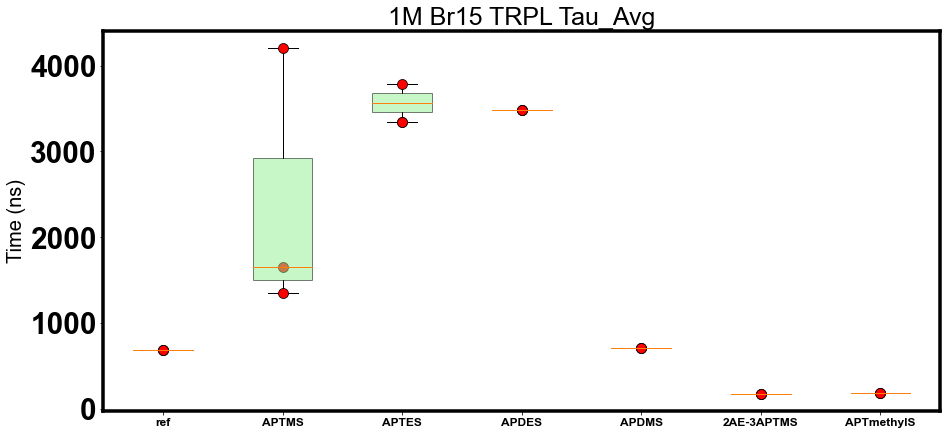

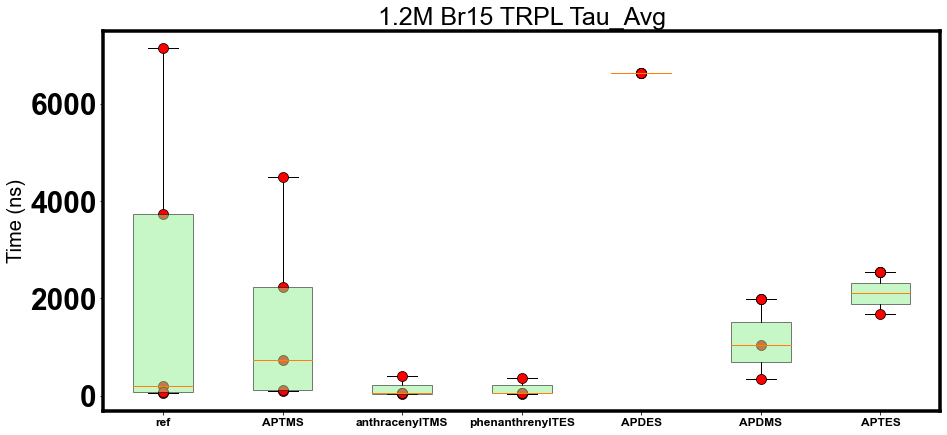

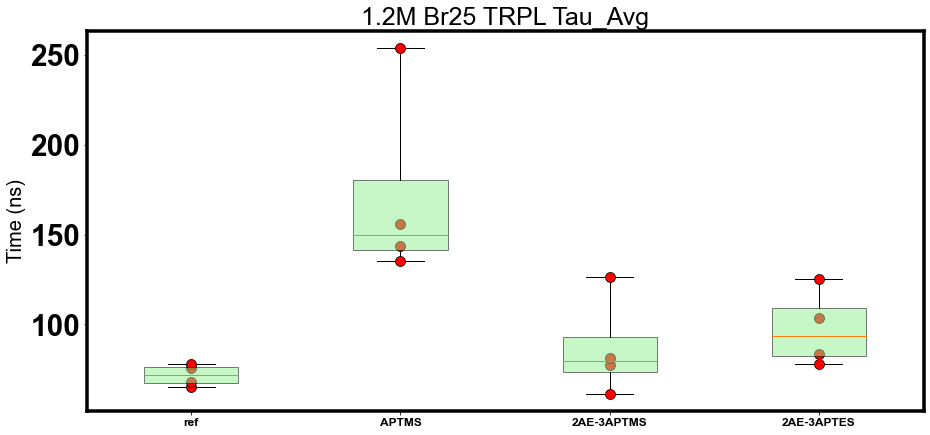

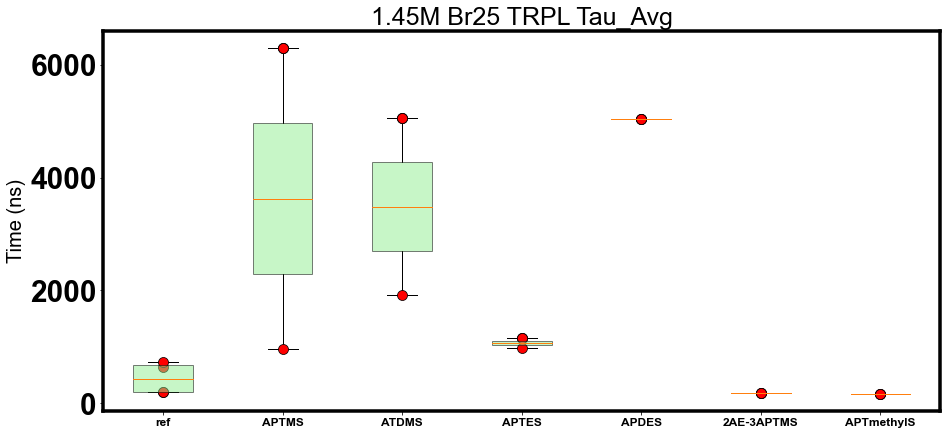

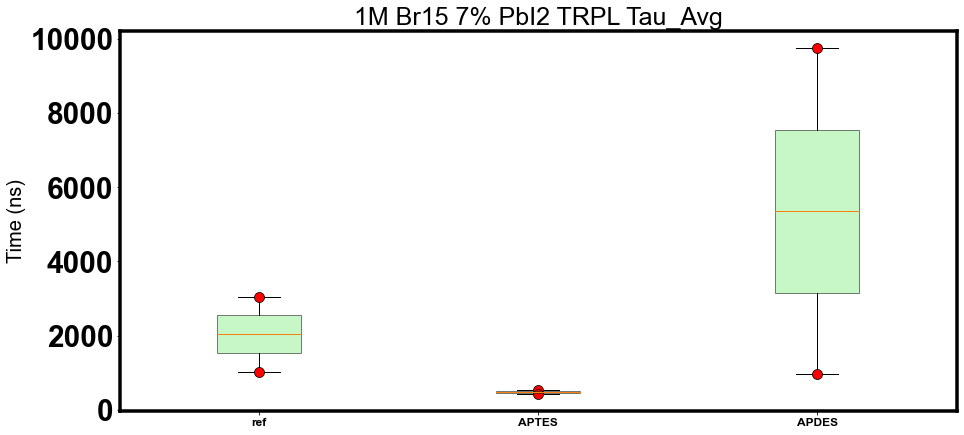

In [37]:
dotsize = 20
xsize = 12
ysize = 20
titlesize = 25
################################################# 
#############  Tau_Avg Br15 1M  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(AAplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot(([1,2,3,4,5,6,7]), AAplotdata2, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)



ax.set_xticklabels(["ref","APTMS","APTES","APDES","APDMS","2AE-3APTMS","APTmethylS"], fontsize = xsize)
plt.title("1M Br15 TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()

################################################# 
#############  Tau_Avg Br15 1.2M  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)


bp = ax.boxplot(ABplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6,7], ABplotdata2, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["ref","APTMS","anthracenylTMS","phenanthrenylTES","APDES","APDMS","APTES"], fontsize = xsize)
plt.title("1.2M Br15 TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()

################################################# 
#############  Tau_Avg Br25 1.2M  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)


bp = ax.boxplot(BBplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4], BBplotdata2, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["ref","APTMS","2AE-3APTMS","2AE-3APTES"], fontsize = xsize)
plt.title("1.2M Br25 TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()

################################################# 
#############  Tau_Avg Br25 1.45M  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)


bp = ax.boxplot(BCplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4,5,6,7], BCplotdata2, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["ref","APTMS","ATDMS","APTES","APDES","2AE-3APTMS","APTmethylS"], fontsize = xsize)
plt.title("1.45M Br25 TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()

################################################# 
#############  Tau_Avg PbI2  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)


bp = ax.boxplot(Pbplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3], Pbplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["ref","APTES","APDES"], fontsize = xsize)
plt.title("1M Br15 7% PbI2 TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()